In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
data = pd.read_csv("C:\\Users\\HP\\Desktop\\labs\\nnv_final_dmpa\\cleaned_data_1.csv")
data.sample (5)

,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight
4549,82444,27452,0.25,15.04,412878.08,681.25,Adult,300mg,3898
4820,82819,5721,0.09,5.33,30492.93,35.89,Adult,300mg,Weight Captured Separately
3075,47356,11980,0.01,3.15,37737.00,81.36,Pediatric,10mg/ml,4621
3162,49540,625,0.04,1.25,781.25,0.97,Pediatric,50mg,34
5692,83982,84,0.02,1.50,126.00,0.27,Adult,15mg,See DN-1667 (ID#:82861)


In [22]:
# Perform simple feature engineering to create a 'total price' feature
data['total price'] = data['pack_price'] * data['unit_price']

# Display the updated dataset with the new feature
print(data.head(10))


   id  line_item_quantity  unit_price  pack_price  line_item_value  \
0   3                1000        0.03        6.20          6200.00   
1  15               31920        0.07        3.99        127360.80   
2  16               38000        0.05        3.20        121600.00   
3  23                 416        0.02        5.35          2225.60   
4  44                 135        0.36       32.40          4374.00   
5  45               16667        0.06        3.65         60834.55   
6  46                 273        0.03        1.95           532.35   
7  47                2800        0.34       41.10        115080.00   
8  60                2800        0.34       41.10        115080.00   
9  64               10000        0.17        9.98         99800.00   

   line_item_insurance sub_classification     dosage                 weight  \
0           240.117626          Pediatric    10mg/ml                    358   
1           240.117626              Adult      150mg                   

In [23]:
# Select relevant features for training
numeric_features = ['line_item_quantity', 'unit_price', 'pack_price', 'line_item_value', 'line_item_insurance', 'weight', 'total price']

In [24]:
# Convert non-numeric values to NaN in numeric columns
data[numeric_features] = data[numeric_features].apply(pd.to_numeric, errors='coerce')

In [25]:
# Drop rows with NaN values
data = data.dropna(subset=numeric_features)

In [26]:
# Scaling features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_features])

In [27]:
from sklearn.svm import OneClassSVM

# Create and train the One-Class SVM model
model = OneClassSVM(nu=0.05)  # Adjust the "nu" parameter as needed
model.fit(data_scaled)


OneClassSVM(nu=0.05)

In [28]:
# Predict anomalies
predictions = model.predict(data_scaled)



In [29]:
# Convert predictions to 0 (normal) and 1 (anomaly)
predictions[predictions == 1] = 0  # Predicted normal
predictions[predictions == -1] = 1  # Predicted anomaly

In [30]:
# Generate synthetic labels based on One-Class SVM predictions
data['predicted_labels'] = predictions


In [31]:
# Assuming anomalies are instances where the predicted label is 1
data['true_labels'] = 0  # Initialize all instances as normal
data.loc[data['predicted_labels'] == 1, 'true_labels'] = 1  # Assign 1 to instances predicted as anomalies


In [32]:
# Evaluate the model
accuracy = accuracy_score(data['true_labels'], data['predicted_labels'])
precision = precision_score(data['true_labels'], data['predicted_labels'])
recall = recall_score(data['true_labels'], data['predicted_labels'])
f1 = f1_score(data['true_labels'], data['predicted_labels'])


In [33]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [34]:
# Count the number of anomalies (outliers) based on predicted labels
anomaly_count = len(data[data['predicted_labels'] == 1])
print(f"Number of anomalies: {anomaly_count}")

Number of anomalies: 227


In [35]:
# Display anomalies
anomalies = data[data['true_labels'] == 1]
print("Anomalies:")
print(anomalies)

Anomalies:
         id  line_item_quantity  unit_price  pack_price  line_item_value  \
72     1179                   8        0.23       76.72           613.76   
82     1283               95500        0.03        1.51        144205.00   
84     1298               70000        0.12        7.50        525000.00   
97     1519                 100        0.55      183.33         18333.00   
169    2685               60784        0.56       16.75       1018132.00   
...     ...                 ...         ...         ...              ...   
7277  85985                  26        0.14        8.58           223.08   
7383  86140               21497        0.16       19.66        422631.02   
7646  86480               24470        0.25       29.68        726269.60   
7724  86579               69963        0.43       12.96        906720.48   
7773  86653              169447        0.06        3.75        635426.25   

      line_item_insurance sub_classification         dosage   weight  \
72  

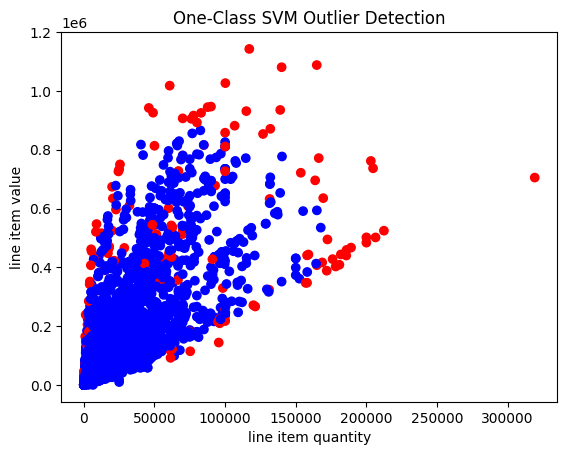

In [36]:
import matplotlib.pyplot as plt

# Define colors for anomalies and inliers
anomaly_color = 'red'
inlier_color = 'blue'

# Create a list of colors based on the predictions
colors = [anomaly_color if prediction == 1 else inlier_color for prediction in predictions]

# Visualize outliers with red and inliers with green
plt.scatter(data['line_item_quantity'], data['line_item_value'], c=colors)
plt.xlabel('line item quantity')
plt.ylabel('line item value')
plt.title('One-Class SVM Outlier Detection')
plt.show()



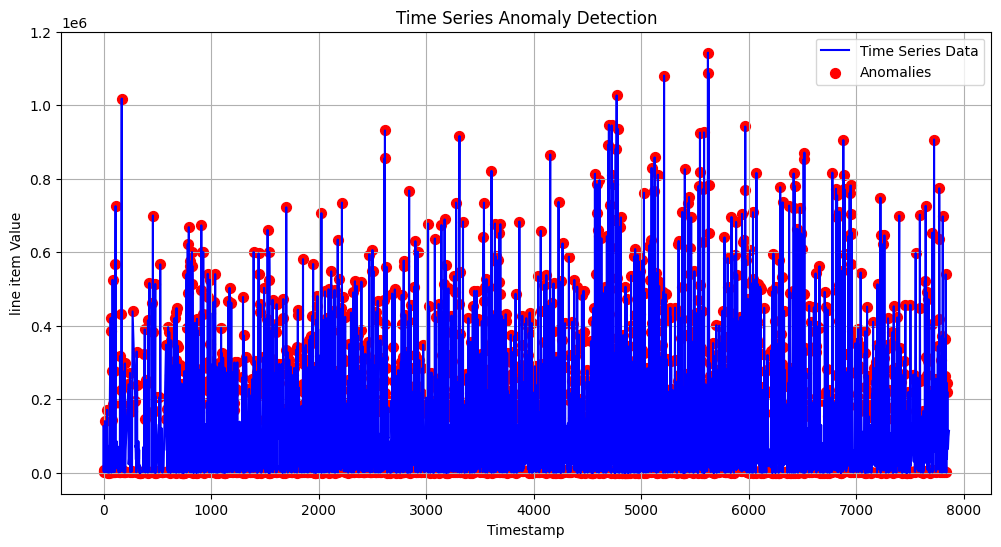

In [37]:
time_series = data['line_item_value']

# Create a One-Class SVM model with default parameters
svm_model = OneClassSVM()

# Fit the model to the time series data
svm_model.fit(time_series.values.reshape(-1, 1))

# Predict anomalies using the One-Class SVM
anomaly_predictions = svm_model.predict(time_series.values.reshape(-1, 1))

# Create a time series plot with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, label='Time Series Data', color='blue')
plt.scatter(time_series.index[anomaly_predictions == -1], time_series[anomaly_predictions == -1], c='red', label='Anomalies', s=50)
plt.title('Time Series Anomaly Detection')
plt.xlabel('Timestamp')
plt.ylabel('line item Value')
plt.legend()
plt.grid(True)
plt.show()

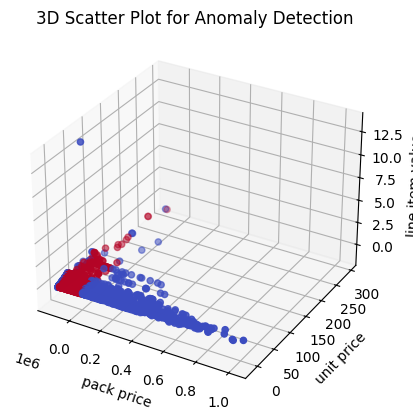

In [38]:
from sklearn.decomposition import PCA

# Select the features for analysis
features = data[['pack_price', 'unit_price', 'line_item_value']]  # Include your features

# Create a One-Class SVM model with default parameters
svm_model = OneClassSVM()

# Fit the model to the features
svm_model.fit(features)

# Predict anomalies using the One-Class SVM
anomaly_predictions = svm_model.predict(features)

# Reduce dimensionality using PCA to visualize in 3D
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

# Create a 3D scatter plot with anomalies highlighted
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=anomaly_predictions, cmap='coolwarm')
ax.set_title('3D Scatter Plot for Anomaly Detection')
ax.set_xlabel('pack price')
ax.set_ylabel('unit price')
ax.set_zlabel('line item value ')

plt.show()